<a href="https://colab.research.google.com/github/Zeecrow16/NegStd_DeepLearning_Mathematics/blob/main/Final_Project_Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind

In [2]:
#Step 1: Load the Iris dataset

In [3]:
iris = load_iris()
X = iris.data.astype(np.float32)
y = iris.target

print(f"Features shape: {X.shape}, Labels shape: {y.shape}")
print(f"Data type of features: {X.dtype}, Data type of labels: {y.dtype}\n")

Features shape: (150, 4), Labels shape: (150,)
Data type of features: float32, Data type of labels: int64



In [ ]:
#Step 2: Data Inspection

In [4]:
# Feature names and classes
print("Feature names:", iris.feature_names)
print("Target classes:", iris.target_names)
print("First 5 samples:\n", X[:5])
print("First 5 labels:", y[:5])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
First 5 samples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 labels: [0 0 0 0 0]


In [ ]:
#Step 3: Random Reproducibility

In [5]:
print("Original labels (first 5):", y[:5])

# Set a fixed seed and shuffle
np.random.seed(16)
indices1 = np.arange(len(X))
np.random.shuffle(indices1)

X1 = X[indices1]
y1 = y[indices1]

print("Shuffled labels with seed 16 (first 5):", y1[:5])

# Set the same seed and shuffle again
np.random.seed(16)
indices2 = np.arange(len(X))
np.random.shuffle(indices2)

X2 = X[indices2]
y2 = y[indices2]

print("Shuffled labels again with seed 16 (first 5):", y2[:5])

# Check if both shuffles are identical
print("Shuffles are identical:", np.array_equal(y1, y2))

Original labels (first 5): [0 0 0 0 0]
Shuffled labels with seed 16 (first 5): [1 0 1 1 1]
Shuffled labels again with seed 16 (first 5): [1 0 1 1 1]
Shuffles are identical: True


In [ ]:
#Step 4: Split into Train and Test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Step 5: Mean and Variance

In [7]:
sample_mean = np.mean(X_train[:5], axis=0)
population_mean = np.mean(X_train, axis=0)
population_variance = np.var(X_train, axis=0)

print('Sample mean: ', sample_mean)
print('Population mean: ', population_mean)
print('Population variance: ', population_variance)

Sample mean:  [5.24       3.5400002  1.96       0.48000002]
Population mean:  [5.8091674 3.0616658 3.7266667 1.1833336]
Population variance:  [0.6729992  0.20003052 3.0451217  0.56122214]


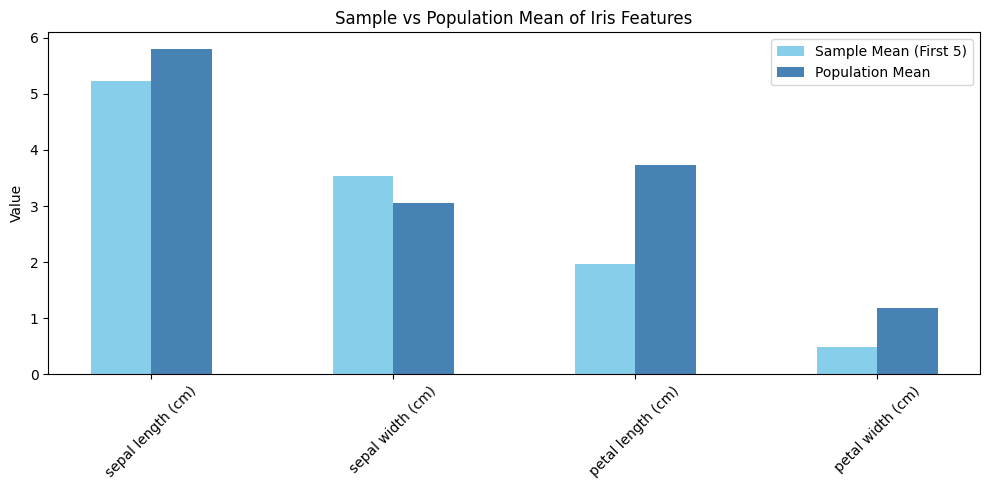

In [8]:
feature_names = iris.feature_names

# Plotting mean for sample and population mean for comparison

x = np.arange(len(feature_names))
width = 0.25

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(x - width/2, sample_mean, width, label='Sample Mean (First 5)', color='skyblue')
ax1.bar(x + width/2, population_mean, width, label='Population Mean', color='steelblue')

ax1.set_ylabel('Value')
ax1.set_title('Sample vs Population Mean of Iris Features')
ax1.set_xticks(x)
ax1.set_xticklabels(feature_names, rotation=45)
ax1.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Step 6: Visualise Matrix and Transpose

In [9]:
sample = X[0].reshape(1, -1) # shape (1, 4) - row vector
print("Original vector (row):", sample)
print("Shape:", sample.shape)

Original vector (row): [[5.1 3.5 1.4 0.2]]
Shape: (1, 4)


In [10]:
sample_T = sample.T           # transpose to column vector (4, 1)
print("Transposed vector (column):", sample_T)
print("Shape:", sample_T.shape, "\n")

Transposed vector (column): [[5.1]
 [3.5]
 [1.4]
 [0.2]]
Shape: (4, 1) 



In [ ]:
#Step 7: The Dot Product

In [24]:
# Random weights for 3 classes (features x classes)
W = np.random.randn(4, 3) * 0.001  # W originally * 0.01 but was adjusted to calculate softmax more effectively
b = np.zeros(3)

# Compute logits:
def compute_logits(sample, W, b):
  logits = np.dot(sample, W) + b           # shape (1, 3)
  logits = logits.flatten()                # make shape (3,) to avoid IndexError
  print("Logits:", logits, "\n")
  return logits

In [ ]:
#Step 8: SoftMax

In [25]:
def softmax(logits):
  num = np.exp(logits)
  demominator = np.sum(np.exp(logits))
  sigma = num / demominator

  print(sigma)
  print(np.sum(sigma))

  return sigma

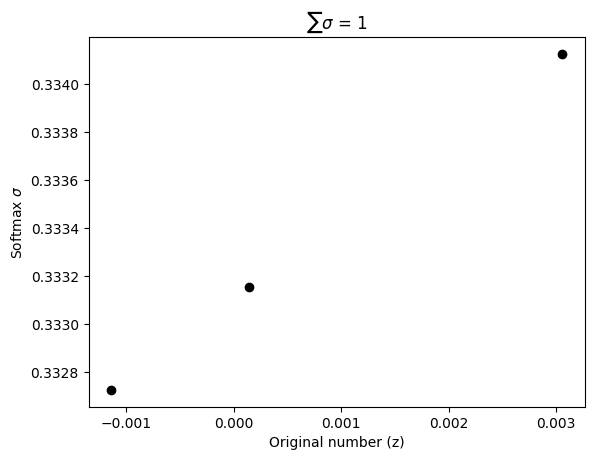

In [ ]:
  #plotting the softmax
  plt.plot(logits, sigma, 'ko')
  plt.xlabel('Original number (z)')
  plt.ylabel('Softmax $\sigma$')
  plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
  plt.show()

In [ ]:
#Step 9: Find the True Class (prep for cross entropy values)

In [31]:
#true index for first sample
true_class = y[0]

In [32]:
num_classes = 3
p = np.zeros(num_classes)
p[true_class] = 1

In [ ]:
#Step 10: Prediction (before training) + ArgMax

In [33]:
def predict(probs):
    pred_class = np.argmax(probs)
    confidence = np.max(probs)
    return pred_class, confidence

In [ ]:
#Step 11: Cross Entropy

In [34]:
def cross_entropy(probs, y_true):
  entropy = 0
  for i in range(num_classes):
      if p[i] != 0:
          entropy -= p[i] * np.log(probs[i])

  print(f"Cross-entropy loss: {entropy:.4f}")

  return entropy

In [ ]:
#Step 12: Model Training

In [35]:
def train_model(X, y, W, b, lr=0.1, epochs=20):
    loss_history = []
    num_classes = b.shape[0]

    for epoch in range(epochs):
        total_loss = 0

        for i in range(X.shape[0]):
            x_i = X[i].reshape(1, -1)              # shape: (1, 4)
            y_i = y[i]

            # Forward pass
            logits = np.dot(x_i, W) + b            # shape: (1, 3)
            logits = logits.flatten()              # shape: (3,)
            probs = softmax(logits)                # your softmax
            loss = cross_entropy(probs, y_i)       # your entropy
            total_loss += loss

            # Backward pass
            grad = probs.copy()
            grad[y_i] -= 1                         # gradient of cross-entropy
            grad = grad.reshape(1, -1)             # shape: (1, 3)
            dW = np.dot(x_i.T, grad)               # shape: (4, 3)
            db = grad.flatten()                    # shape: (3,)

            # Update weights
            W -= lr * dW
            b -= lr * db

        avg_loss = total_loss / X.shape[0]
        loss_history.append(avg_loss)

    return W, b, loss_history


In [ ]:
W_trained, b_trained, loss_history = train_model(X_train, y_train, W, b)

In [ ]:
#Step 13 : Evaluate model performance

In [37]:
def evaluate_accuracy(X_test, y_test, W, b):
    correct = 0
    for i in range(len(X_test)):
        logits = np.dot(X_test[i], W) + b
        probs = softmax(logits)
        pred_class, _ = predict(probs)
        if pred_class == y_test[i]:
            correct += 1
    return correct / len(X_test)

In [ ]:
#Step 14: Model Predictions (after training)

In [38]:
def print_predictions(X_test, y_test, W, b, n=10):
    print("\nSample predictions (Predicted | Confidence | Actual):")
    for i in range(n):
        logits = np.dot(X_test[i], W) + b
        probs = softmax(logits)
        pred_class, confidence = predict(probs)
        print(f"{pred_class:9d} | {confidence:.4f}     | {y_test[i]:6d}")

In [39]:
print_predictions(X_test, y_test, W_trained, b_trained)


Sample predictions (Predicted | Confidence | Actual):
[5.33100879e-04 9.94378220e-01 5.08867909e-03]
0.9999999999999999
        1 | 0.9944     |      1
[9.94872683e-01 5.12731675e-03 3.05095413e-24]
1.0
        0 | 0.9949     |      0
[4.40717462e-15 1.38494331e-08 9.99999986e-01]
1.0
        2 | 1.0000     |      2
[0.00223505 0.98213098 0.01563397]
1.0
        1 | 0.9821     |      1
[3.74937174e-04 9.99119712e-01 5.05351118e-04]
1.0000000000000002
        1 | 0.9991     |      1
[9.91463186e-01 8.53681444e-03 1.57301989e-22]
1.0
        0 | 0.9915     |      0
[4.20706747e-02 9.57926319e-01 3.00583495e-06]
1.0
        1 | 0.9579     |      1
[1.04505823e-04 9.00024650e-02 9.09893029e-01]
1.0
        2 | 0.9099     |      2
[1.48089945e-04 8.56596164e-01 1.43255746e-01]
1.0
        1 | 0.8566     |      1
[6.31552239e-03 9.93666574e-01 1.79037907e-05]
1.0
        1 | 0.9937     |      1


In [ ]:
#Acuracy results:

In [40]:
acc = evaluate_accuracy(X_test, y_test, W, b)
print(f"Accuracy on test set: {acc*100:.2f}%")

[5.33100879e-04 9.94378220e-01 5.08867909e-03]
0.9999999999999999
[9.94872683e-01 5.12731675e-03 3.05095413e-24]
1.0
[4.40717462e-15 1.38494331e-08 9.99999986e-01]
1.0
[0.00223505 0.98213098 0.01563397]
1.0
[3.74937174e-04 9.99119712e-01 5.05351118e-04]
1.0000000000000002
[9.91463186e-01 8.53681444e-03 1.57301989e-22]
1.0
[4.20706747e-02 9.57926319e-01 3.00583495e-06]
1.0
[1.04505823e-04 9.00024650e-02 9.09893029e-01]
1.0
[1.48089945e-04 8.56596164e-01 1.43255746e-01]
1.0
[6.31552239e-03 9.93666574e-01 1.79037907e-05]
1.0
[1.88930135e-04 1.41831643e-01 8.57979426e-01]
1.0
[9.71260255e-01 2.87397448e-02 8.30105292e-21]
1.0
[9.95954298e-01 4.04570239e-03 3.06168865e-25]
1.0
[9.70696748e-01 2.93032521e-02 6.49657725e-21]
1.0
[9.97921569e-01 2.07843137e-03 1.51950618e-23]
1.0
[0.00482739 0.99127996 0.00389265]
0.9999999999999998
[3.16782476e-10 4.08842345e-06 9.99995911e-01]
1.0
[2.95456423e-03 9.96952471e-01 9.29646991e-05]
1.0
[0.00134057 0.96302025 0.03563919]
1.0
[4.05323337e-10 5.2197

In [ ]:
#Accuracy output:

#Accuracy on test set: 100.00%

In [ ]:
#Step 15: Gradient Descent (Derivatives)

In [41]:
# Simple quadratic loss: L(w) = (w - 3)^2
def loss_fn(w):
    return (w - 3)**2

# Derivative: L'(w) = 2(w - 3)
def grad_fn(w):
    return 2 * (w - 3)

w = 0  # initial weight
lr = 0.1  # learning rate
iterations = 10
w_values = [w]

for i in range(iterations):
    grad = grad_fn(w)
    w -= lr * grad
    w_values.append(w)
    print(f"Iteration {i+1}: w = {w:.4f}, loss = {loss_fn(w):.4f}")

Iteration 1: w = 0.6000, loss = 5.7600
Iteration 2: w = 1.0800, loss = 3.6864
Iteration 3: w = 1.4640, loss = 2.3593
Iteration 4: w = 1.7712, loss = 1.5099
Iteration 5: w = 2.0170, loss = 0.9664
Iteration 6: w = 2.2136, loss = 0.6185
Iteration 7: w = 2.3709, loss = 0.3958
Iteration 8: w = 2.4967, loss = 0.2533
Iteration 9: w = 2.5973, loss = 0.1621
Iteration 10: w = 2.6779, loss = 0.1038


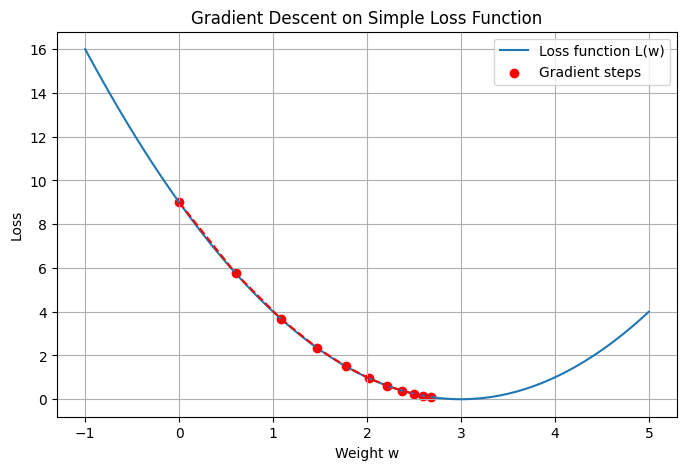

In [42]:
ws = np.linspace(-1, 5, 100)
losses = loss_fn(ws)

plt.figure(figsize=(8,5))
plt.plot(ws, losses, label="Loss function L(w)")
plt.scatter(w_values, loss_fn(np.array(w_values)), color='red', label='Gradient steps')
plt.plot(w_values, loss_fn(np.array(w_values)), color='red', linestyle='--')
plt.xlabel("Weight w")
plt.ylabel("Loss")
plt.title("Gradient Descent on Simple Loss Function")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Step 16: T Test

In [43]:
#Evaluate Model
def evaluate_model(X, y, W, b):
    total_loss = 0
    for i in range(X.shape[0]):
        x_i = X[i].reshape(1, -1)
        y_i = y[i]
        logits = np.dot(x_i, W) + b
        logits = logits.flatten()
        probs = softmax(logits)
        total_loss += cross_entropy(probs, y_i)
    return total_loss / X.shape[0]

In [44]:
def run_multiple_training_runs(X_train, y_train, X_val, y_val, lr, epochs=20, runs=10):
    val_losses = []
    for _ in range(runs):
        # Reinitialise weights and biases for each run
        W_init = np.random.randn(4, 3) * 0.001
        b_init = np.zeros(3)

        W_trained, b_trained, _ = train_model(X_train, y_train, W_init, b_init, lr=lr, epochs=epochs)
        val_loss = evaluate_model(X_val, y_val, W_trained, b_trained)
        val_losses.append(val_loss)
    return val_losses

In [ ]:
# omparing lr=0.1 and lr=0.05
val_losses_lr_1 = run_multiple_training_runs(X_train, y_train, X_test, y_test, lr=0.1)
val_losses_lr_2 = run_multiple_training_runs(X_train, y_train, X_test, y_test, lr=0.05)

stat, p_value = ttest_ind(val_losses_lr_1, val_losses_lr_2)
print(f"T-test statistic: {stat:.4f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference between learning rates")
else:
    print("No significant difference detected")

In [ ]:
#output:
# T-test statistic: 23363.5213, p-value: 0.0000
# Significant difference between learning rates